# Projet3 : Chaines de Markov et épidémiologie 

In [1]:
#quelques bibliothèque utiles
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib

# Partie 1
### Question 1 : 
A partir de la séquence d’observation S, S, S, I, I, I, I, I, I, R, on peut déduir les pobabilité de transition comme la formule suivant : $p(x|y)=P(c_i|c_{i-1})$ avec $x, y \in \{S, I, R \}$

Et la matrice de probabilité de transitions est :
$$\begin{matrix}
 & S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1 
\end{matrix}$$

In [2]:
#Partie 1; Question 2 lire des données
np.loadtxt('data_exo.txt')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 2., 2., 2.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [3]:
#Partie 1; Question 1.3
def matriceTransition(ficNom):
    """
    Entree : nom du ficher
    Sortie : la matrice de probabilité de transitions
    """
    ls = np.loadtxt(ficNom)
    ss, si, ii, ir, rr, rs = 0, 0, 0, 0, 0, 0  
    
    for i in range(0, len(ls)):
        l = len(ls[i])
        #les cas different
        for j in range(1, l):
            if(ls[i][j-1] == 0 and ls[i][j] == 0):
                ss+=1
            if(ls[i][j-1] == 0 and ls[i][j] == 1):
                si+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 1):
                ii+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 2):
                ir+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 2):
                rr+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 0):
                rs+=1
    #calculation
    return np.array([[ss/(ss + si), (si/(ss + si)), 0], 
                    [0, ii/(ii + ir), ir/(ii + ir)], 
                    [rs/(rs + rr), 0, rr/(rs + rr)]])
        

In [4]:
#test pour matriceTransition()
matriceTransition('data_exo.txt')

array([[0.93082918, 0.06917082, 0.        ],
       [0.        , 0.93518148, 0.06481852],
       [0.04065945, 0.        , 0.95934055]])

# Partie 2 
### Question 1:
A partir du graphe de transition, la matrice de transition A est :
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

Pour vérifier si une matrice de transition est stochastique, on doit ajouter la valeur de contenue de chaque ligne. Si la somme vaut 1, la matrice est stochastique.

In [5]:
def verifierMat(matrice):
    """
    Entree : une matrice en format de list[list[float]]
    Sorite : retourne 1 si la matrice est stochastique, et 0 sinon
    """
    #parcours la matrice
    for i in range(len(matrice)):
        sommeLigne=0
        for j in range(len(matrice[i])):
            sommeLigne+=matrice[i][j]
        if not sommeLigne==1:
            return 0
    return 1

In [6]:
#test pour verifierMat()
MatA=np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
print(verifierMat(MatA))

1


### Question 2 :
Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.
Donc, on a : $\pi_0 = [0.9, 0.1, 0]$

# Distribution $π_t$
### Question 1 :
$\pi_1[0]=\pi_0[0]*P_{ss}=0.828$ <br>
$\pi_1[1]=\pi_0[0]*P_{si}+\pi_0[1]*P_{ii}=0.165$ <br>
$\pi_1[2]=\pi_0[2]+\pi_0[1]*P_{ir}=0.007$ <br>


### Question 2 :
$\pi_2[0]=\pi_1[0]*P_{ss}=0.76176$ <br>
$\pi_2[1]=\pi_1[0]*P_{si}+\pi_1[1]*P_{ii}=0.21969$ <br>
$\pi_2[2]=\pi_1[1]*P_{ir}=0.01855$ <br>

### Question 3:
$\pi_t[0]=\pi_t-1[0]*P_{ss}$ <br>
$\pi_t[1]=\pi_t-1[0]*P_{si}+\pi_t-1[1]*P_{ii}$ <br>
$\pi_t[2]=\pi_t-1[1]*P_{ir}$ <br>

In [7]:
#Question 3 : La distribution théorique dans chaque états
def calDistribution(t, matrice, pi_0):
    """
    Entree : 
        t: le temps pour chaque états
        matrice : la matrice de transition
        pi_0 : distribution de probabilité initiale
    Sortie :
        distribution théorique des effectifs
    """
    res=list(pi_0)
    for i in range(t):
        tmp=res
        #calculation pour les 3 états : S, I, R
        res[0]=tmp[0]*matrice[0][0]
        res[1]=tmp[0]*matrice[0][1] + tmp[1]*matrice[1][1]
        res[2]+=tmp[1]*matrice[1][2]

    return res

# Question 4 : Tracer la graphe de la probabilité transitions
def drawGraphe(t, matrice, list_T0):
    """
    retourne une graphe lineaire
    """
    sain, infecte, gueri, T=[], [], [], []
    
    for i in range(t):
        distribution=calDistribution(i, matrice, list_T0)
        T.append(i)
        sain.append(distribution[0])
        infecte.append(distribution[1])
        gueri.append(distribution[2])   
    
    x=np.arange(20,350)
    l1=plt.plot(T, sain,'r--',label='Sain')
    l2=plt.plot(T, infecte,'g--',label='Infecté')
    l3=plt.plot(T, gueri,'b--',label='Guéri')
    plt.plot(T, sain,'r--', T, infecte,'g--', T, gueri, 'b--')
    plt.title('probabilité de transitions dans chaque état')
    plt.xlabel('temps')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

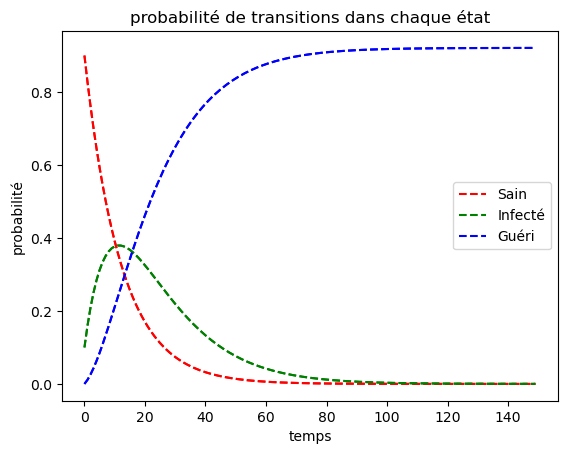

In [8]:
# test pour calDistribution() et drawGraphe()
pi_0=[0.9, 0.1, 0]
drawGraphe(150, MatA, pi_0)

A partir du graphique, nous pouvons analyser :<br>
Après environ 10 jours, le nombre de personnes infectées atteint un maximum ; après environ 100 jours, tout le monde est guéri (ou n'a jamais été infecté).

# Tirage aléatoire des états



In [9]:
def creatMarkov(nbSequence, matrice, pi_0):
    """
    Entree : 
        nbSequence : la taille de liste T
        matrice, pi_0 : le même
    Sortie : 
        une chaine Markov en base de "matrice" et " pi_0"
    """
    chaine=[]
    prob=rd.uniform(0, 1)       #creer une valeur au hasard entre (0, 1)
    
    #insertion du premier letter
    if prob > pi_0[0]:
        chaine.append(1)
    else:
        chaine.append(0)
        while(len(chaine) < nbSequence):      #transitions 0->0
            prob=rd.uniform(0, 1)
            if prob > matrice[0][0]:      
                chaine.append(1)              #on utilise "break" ici,
                break                         #car il n'y pas une transition de 1->0
            chaine.append(0)
    
    while(len(chaine) < nbSequence):          #transitions 1->1
        prob=rd.uniform(0, 1)
        if prob > matrice[1][1]:
            chaine.append(2)
            break
        chaine.append(1)
        
    for i in range(len(chaine), nbSequence):  #transition 2->2
        chaine.append(2)
    
    return chaine

In [10]:
#test pour creatMarkov()
print(creatMarkov(150, MatA, pi_0))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Modélisation d’une population

In [11]:
#Question 1
def countNum(population, t):
    """
    Entree 
        population : en forme de une liste de chaine Markov pour chaque individus
        t : le temps
    Sortie 
        le nombre d'individus pour chaque états dans chaque jour
    """
    nbS, nbI, nbR=0, 0, 0
    for j in range(len(population)):
        if population[j][t]== 0:
            nbS+=1
        if population[j][t]== 1:
            nbI+=1
        if population[j][t]== 2:
            nbR+=1
    return [nbS, nbI, nbR]

#Question 2
def showPercent(numListe):
    """
    Entree : le nombre d'individus pour chaque états
    Sortie : la pourcentage de chaque états
    """
    nbSomme=numListe[0]+numListe[1]+numListe[2]
    return [numListe[0]/nbSomme, numListe[1]/nbSomme, numListe[2]/nbSomme]

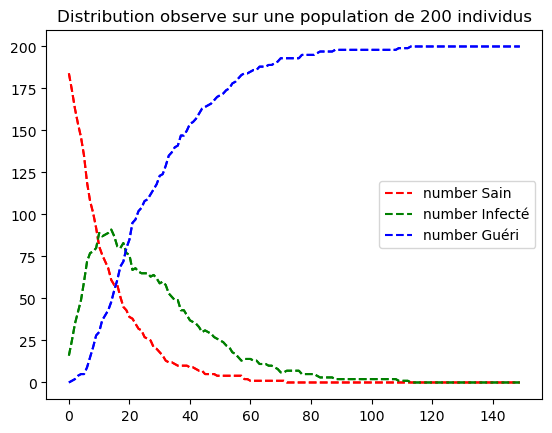

In [12]:
#test pour le module d'une population
#une population de 5 individus
listePopulation1=[[] for i in range(5)]
for i in range(5):
    listePopulation1[i]=creatMarkov(150, MatA, pi_0)
    
#une population de 200 individus
listePopulation2=[[] for i in range(200)]
for i in range(200):
    listePopulation2[i]=creatMarkov(150, MatA, pi_0)

#une population de 1000 individus
listePopulation3=[[] for i in range(1000)]
for i in range(1000):
    listePopulation3[i]=creatMarkov(150, MatA, pi_0)

T, numS, numI, numR=[], [], [], []
for i in range(150):
    numListe=countNum(listePopulation2, i)
    T.append(i)
    numS.append(numListe[0])
    numI.append(numListe[1])
    numR.append(numListe[2])
    
x=np.arange(20,350)
l1=plt.plot(T, numS,'r--',label='number Sain')
l2=plt.plot(T, numI,'g--',label='number Infecté')
l3=plt.plot(T, numR,'b--',label='number Guéri')
plt.plot(T, numS,'r--', T, numI,'g--', T, numR, 'b--')
plt.title('Distribution observe sur une population de 200 individus')
plt.legend()
plt.show()

Après cela, nous avons mené une nouvelle expérience en modifiant la taille de la population, ce qui a donné les graphiques suivants :
<p style="text-align:center"><img src="./captureModele.jpg" width=60%></p> <br>

# Longueur de l’infection

In [13]:
#pour Question 1
def countInfectionListe(chaineSequence):
    """
    retourne la longueur de la sequence infecté pour un individu
    """
    count=0
    for i in range(len(chaineSequence)):
        if chaineSequence[i]==1:
            count+=1
    return count

def countInfectionPopulation(population):
    """
    retourne la longueur moyenne de la sequence infecté
    """
    sommeInfection=0
    for i in range(len(population)):
        sommeInfection+=countInfectionListe(population[i])
    return int(sommeInfection/len(population))

#pour Question 2
def drawFromData(dicdata,RANGE, heng=0):
    """
    dicdata：
    RANGE：nombre de colonne que tu veut présenter
    heng=0 : représente une barre qui est verticalement
    heng=1，représente une colonne qui est horizontale
    """
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.show()
        return 
    else:
        return "invalide valeur de heng"
    
def showInfectionHistogramme(population):
    """
    Affichez la distribution estimé de la longueur d’infection
    """
    infectionDic={}
    for i in range(len(population)):
        lengthChaine=countInfectionListe(population[i])
        if lengthChaine not in infectionDic.keys():
            infectionDic[lengthChaine]=1/len(population)
        else:
            infectionDic[lengthChaine]+=1/len(population)
    
    drawFromData(infectionDic, len(infectionDic), 0)


la longueur moyenne d’une séquence de I pour une population de 1000 personne : 14.000000




distribution observée de la longueur d’infection


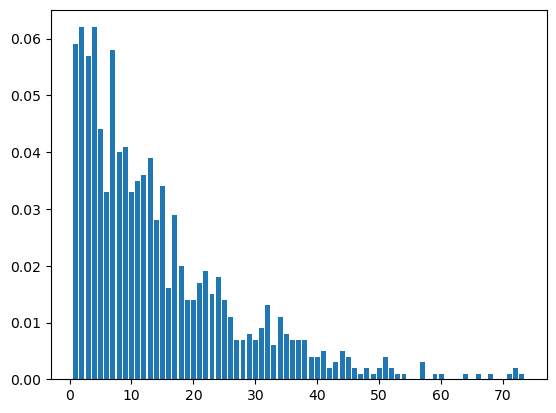

In [14]:
#test pour countInfection()
print("la longueur moyenne d’une séquence de I pour une population de 1000 personne : {:f}".format(countInfectionPopulation(listePopulation3)))

#test pout showInfectionHistogramme()
print("\n\n\n")
print("distribution observée de la longueur d’infection")
showInfectionHistogramme(listePopulation3)

### Question 3 
En cas de la longueur de chaine Markov est assez grand, par exemple 150 <br>
donc, ce qui veut dire que un individu peut définitivement passer d'un état infecté à un état guéri au cours de cette période.

Par conséquent, la moyenne de longueur théorique d’une séquence de I est égale à l'espériance de $X ～ GE(P_{IR})$ <br>
$E(x)=\frac {1} {P_{IR}}\approx14.286$ pour une population de 1000 individus

### Question 4
Pour éviter les événements fortuits, nous calculons la longueur moyenne d’une séquence de I pour une population de 1000 individus  k fois et prenons la moyenne pour obtenir la longueur estimée

In [15]:
def countEstimeLen(k):
    """
    retourne la moyenne de la longueur estimée dans k fois
    """
    somme=0
    for i in range(k):
        listePopulation=[[] for i in range(1000)]
        for i in range(1000):
            listePopulation[i]=creatMarkov(150, MatA, pi_0)
        somme+=countInfectionPopulation(listePopulation)
    return int(somme/k)

In [16]:
print("longueur estimée moyenne en {:d} fois est : {:d}".format(1000, countEstimeLen(1000)))
print("longueur théorique est : 14.286")

longueur estimée moyenne en 1000 fois est : 13
longueur théorique est : 14.286


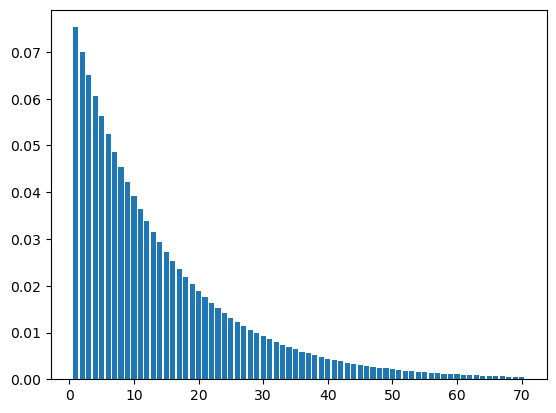

In [17]:
#pour Question 5
def showInfectionTheorique(length, p_ir):
    """
    Affichez la distribution théorique de la longueur d’infection
    """
    dic={}
    for i in range(length):
        dic[i+1]=(1-p_ir)**(i-1) * p_ir
    
    drawFromData(dic, len(dic), 0)
    
showInfectionTheorique(70, 0.07)

# Partie 3 Description du second modèle
# Analyse du modèle
### Question 1:
Ce processus peut être simulé avec une chaîne de Markov. Il n'y a pas de différence essentielle entre les modèles SIRS et SIR.

### Question 2:
A partir du graphe de transition, la matrice de transition A est :
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0.02 & 0 & 0.98 
\end{matrix}$$

Pour vérifier si une matrice de transition est stochastique, on doit ajouter la valeur de contenue de chaque ligne. Si la somme vaut 1, la matrice est stochastique.

### Question 3:
Ce modèle est périodique, mais pas irréductible

### Question 4:
Car $\pi*A=\pi$ et $\pi[0]+\pi[1]+\pi[2]=1$


On a $\pi=[7/43,8/43,28/43]$

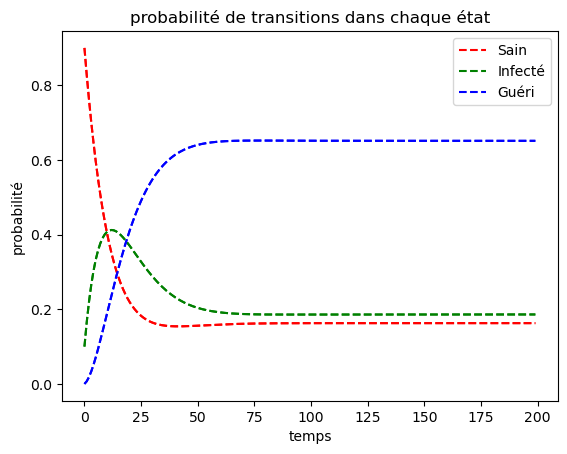

In [18]:
#Question 3.5 :
def calDistributionNew(t, matrice, pi_0):
    """
    Entree : 
        t: le temps pour chaque états
        matrice : la matrice de transition
        pi_0 : distribution de probabilité initiale
    Sortie :
        distribution théorique des effectifs
    """
    res=list(pi_0)
    for i in range(t):
        tmp=list(res)
        #calculation pour les 3 états : S, I, R
        res[0]=tmp[0]*matrice[0][0]+tmp[2]*matrice[2][0]
        res[1]=tmp[0]*matrice[0][1]+tmp[1]*matrice[1][1]
        res[2]=tmp[1]*matrice[1][2]+tmp[2]*matrice[2][2]

    return res

def drawGrapheNew(t, matrice, list_T0):
    """
    retourne une graphe lineaire
    """
    sain, infecte, gueri, T=[], [], [], []
    
    for i in range(t):
        distribution=calDistributionNew(i, matrice, list_T0)
        T.append(i)
        sain.append(distribution[0])
        infecte.append(distribution[1])
        gueri.append(distribution[2])   
    
    x=np.arange(20,350)
    l1=plt.plot(T, sain,'r--',label='Sain')
    l2=plt.plot(T, infecte,'g--',label='Infecté')
    l3=plt.plot(T, gueri,'b--',label='Guéri')
    plt.plot(T, sain,'r--', T, infecte,'g--', T, gueri, 'b--')
    plt.title('probabilité de transitions dans chaque état')
    plt.xlabel('temps')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

p0=[0.9,0.1,0]
m=[[0.92,0.08,0],[0,0.93,0.07],[0.02,0,0.98]]
drawGrapheNew(200,m,p0)
#S diminue rapidement, I augmente d'abord puis diminue, R augmente régulièrement

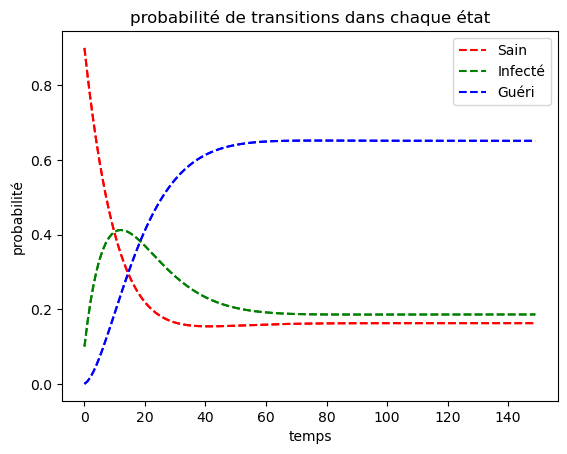

In [19]:
#Question 3.6 :
#??? 
drawGrapheNew(150,m,p0)

Quelle que soit la situation initiale, les proportions des trois groupes SIR tendent 
vers la même valeur après une période de transmission suffisamment longue.

# Longueur de l’immunité

In [20]:
def countRecoverList(chaineSequence):
    """
    retourne la longueur de la sequence guéri pour un individu
    """
    count=0
    for i in range(len(chaineSequence)):
        if chaineSequence[i]==2:
            count+=1
    return count

def countRecoverPopulation(population):
    """
    retourne la longueur moyenne de la sequence guéri
    """
    sommeRecover=0
    for i in range(len(population)):
        sommeRecover+=countRecoverList(population[i])
    return int(sommeRecover/len(population))

### Question 1
Supposons que la durée de la simulation soit de 150 jours. On a la longueur moyenne de r entre 200 personnes :

In [21]:
l2d=[[] for i in range(200)]
for i in range(200):
    l2d[i]=creatMarkov(150, m, p0)
    
print(countRecoverPopulation(l2d))

123


### Question 2
Nous définissons une fonction Lr(d,stat) pour calculer le nombre de fois où l'état d'une personne est R en d jours lorsque l'état initial est stat.
En supposant que l'état d'une personne le premier jour est R, alors la durée totale de son état dans R en 1000 jours est : 

$Lr(1000,2)1=A[2][2]*Lr(999,R)+A[2][0]*Lr(999,S)+A[2][1]*Lr(999,I)$

Nous avons remarqué que lorsque d est très grand, d-1 peut être représenté par d. Nous avons constaté que la durée théorique de l'état R d'une personne est $d*\pi[2]$ à ce moment, lorsque $\pi*A=\pi$.

Par conséquent, la valeur théorique de sa longueur est $150*\pi[2]=97.67$

### Question 3

In [31]:
def recoverEstime(population):
    """
    Affichez la distribution estimé de la longueur d’infection
    """
    recoverDic={}
    for i in range(len(population)):
        lengthChaine=countRecoverList(population[i])
        if lengthChaine not in recoverDic.keys():
            recoverDic[lengthChaine]=1/len(population)
        else:
            recoverDic[lengthChaine]+=1/len(population)
    
    return recoverDic

#pour Question 5
def recoverTheorique(length, tpiR):
    """
    Affichez la distribution théorique de la longueur d’infection
    """
    d=dict()
    for i in range(length):
        d[i+1]=(i+1)*tpiR/1000
    return d

{49: 0.035000000000000024, 65: 0.023000000000000013, 32: 0.008, 55: 0.02900000000000002, 35: 0.017000000000000008, 60: 0.024000000000000014, 47: 0.01800000000000001, 41: 0.017000000000000008, 34: 0.010000000000000002, 13: 0.005, 56: 0.026000000000000016, 42: 0.01900000000000001, 62: 0.024000000000000014, 53: 0.027000000000000017, 45: 0.02000000000000001, 51: 0.028000000000000018, 57: 0.02900000000000002, 52: 0.03300000000000002, 46: 0.025000000000000015, 50: 0.03000000000000002, 66: 0.027000000000000017, 44: 0.024000000000000014, 6: 0.005, 68: 0.010000000000000002, 43: 0.02000000000000001, 38: 0.01900000000000001, 27: 0.008, 59: 0.026000000000000016, 37: 0.016000000000000007, 63: 0.022000000000000013, 26: 0.014000000000000005, 31: 0.012000000000000004, 67: 0.01900000000000001, 39: 0.012000000000000004, 12: 0.003, 64: 0.028000000000000018, 61: 0.023000000000000013, 0: 0.023000000000000013, 23: 0.008, 58: 0.024000000000000014, 14: 0.007, 48: 0.022000000000000013, 10: 0.002, 33: 0.0130000

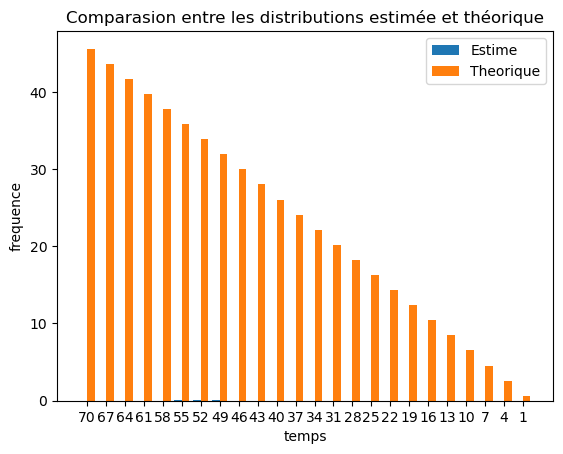

In [33]:
#affichage de l'histogramme d'infection estimée et théorique
ltmp=[[] for i in range(1000)]
for i in range(1000):
    ltmp[i]=creatMarkov(70, m, p0)
dic1=recoverEstime(ltmp)
dic2=recoverTheorique(70, 28/43)
width = 0.4
print(dic1)
#lire les données sur les dictionaire
value2 = sorted(dic2.items(),key = lambda item:item[1],reverse=True)
x=[]
y1, y2=[], []
for d in value2:
    x.append(d[0])
    y2.append(d[1])
    if d[0] in dic1.keys():
        y1.append(dic1[d[0]])
    else:
        y1.append(0)
    
x=[x[i] for i in range(len(x)) if i%3==0]
y1=[y1[i] for i in range(len(y1)) if i%3==0]
y2=[y2[i] for i in range(len(y2)) if i%3==0]
coor = np.arange(len(x))
fig, ax = plt.subplots()
rects1 = ax.bar(coor - width/2, y1, width, label='Estime')
rects2 = ax.bar(coor + width/2, y2, width, label='Theorique')
ax.set_ylabel('frequence')
ax.set_xlabel('temps')
ax.set_title('Comparasion entre les distributions estimée et théorique')
ax.set_xticks(coor)
ax.set_xticklabels(x)
ax.legend()